# 十二 HMM 隐马尔可夫模型

## 1 HMM 隐马尔可夫模型
隐马尔可夫模型是关于时序的概率模型，描述由一个隐藏的马尔可夫链随机生成不可观测的状态的序列，再由各个状态随机生成一个观测而产生观测的序列的过程。

隐马尔可夫模型由初始状态概率向$\pi$、状态转移概率矩阵$A$和观测概率矩阵$B$决定。因此，隐马尔可夫模型可以写成$\lambda=(A, B, \pi)$。

隐马尔可夫模型是一个生成模型，表示状态序列和观测序列的联合分布，但是状态序列是隐藏的，不可观测的。

隐马尔可夫模型可以用于标注，这时状态对应着标记。标注问题是给定观测序列预测其对应的标记序列。

## 2 HMM的三个基本问题
1. Evaluation：概率计算问题。给定模型$\lambda=(A, B, \pi)$和观测序列$O＝(o_1，o_2,…,o_T)$，计算在模型$\lambda$下观测序列$O$出现的概率$P(O|\lambda)$。前向-后向算法是通过递推地计算前向-后向概率可以高效地进行隐马尔可夫模型的概率计算。
 
2. Learning：学习问题。已知观测序列$O＝(o_1，o_2,…,o_T)$，估计模型$\lambda=(A, B, \pi)$参数，使得在该模型下观测序列概率$P(O|\lambda)$最大。即用极大似然估计的方法估计参数。Baum-Welch算法，也就是EM算法可以高效地对隐马尔可夫模型进行训练。它是一种非监督学习算法。

3. Decoding：预测问题。已知模型$\lambda=(A, B, \pi)$和观测序列$O＝(o_1，o_2,…,o_T)$，求对给定观测序列条件概率$P(I|O)$最大的状态序列$I＝(i_1，i_2,…,i_T)$。维特比算法应用动态规划高效地求解最优路径，即概率最大的状态序列。

/var/folders/cc/_fp3lvjs5yj560jjt4vv9v9w0000gn/T/ipykernel_7347/1926925259.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


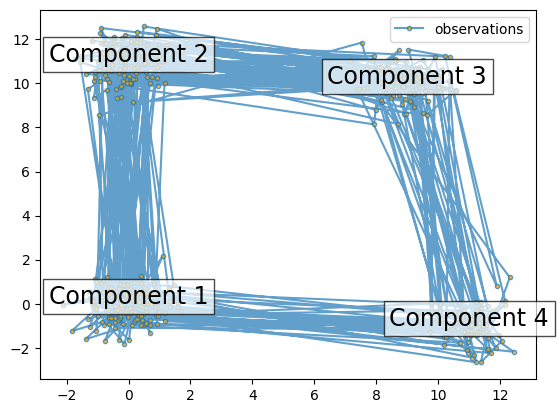

In [1]:
#pip install hmmlearn

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
%matplotlib inline

# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0, 0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
gen_model.startprob_ = startprob
gen_model.transmat_ = transmat
gen_model.means_ = means
gen_model.covars_ = covars

# Generate samples
X, Z = gen_model.sample(500)

# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
        mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    ax.text(m[0], m[1], 'Component %i' % (i + 1),
            size=17, horizontalalignment='center',
            bbox=dict(alpha=.7, facecolor='w'))
ax.legend(loc='best')
fig.show()

In [ ]:
scores = list()
models = list()
for n_components in (3, 4, 5):
    # define our hidden Markov model
    model = hmm.GaussianHMM(n_components=n_components,
                            covariance_type='full', n_iter=10)
    model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
    models.append(model)
    scores.append(model.score(X[X.shape[0] // 2:]))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(X)

In [ ]:
#让我们将我们的状态与生成的状态和我们的转换矩阵进行比较，来看我们的模型
# plot model states over time
fig, ax = plt.subplots()
ax.plot(Z, states)
ax.set_title('States compared to generated')
ax.set_xlabel('Generated State')
ax.set_ylabel('Recovered State')
fig.show()

# plot the transition matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.imshow(gen_model.transmat_, aspect='auto', cmap='spring')
ax1.set_title('Generated Transition Matrix')
ax2.imshow(model.transmat_, aspect='auto', cmap='spring')
ax2.set_title('Recovered Transition Matrix')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

fig.tight_layout()
fig.show()